In [ ]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore::ImportWarning'

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install numpy==1.26.4 --force-reinstall
import numpy as np

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.0 which is incompatible.


In [ ]:
!pip install scipy==1.13.0
!pip install mne==0.22.0

In [ ]:
import os
import time
import pickle
import pandas as pd

from scipy import signal
from scipy.signal import welch
from scipy.integrate import simpson as simps
from scipy.stats import f_oneway

#!pip install scikit-learn==0.20.3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from mne.time_frequency import psd_welch
from mne.decoding import cross_val_multiscore

!pip install fooof
from fooof import FOOOFGroup
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.spectra import plot_spectrum

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.11/dist-packages/skfeature_chappers-1.1.0.dist-info/top_level.txt' mode='r' encoding='utf-8'>
  for line in open(toplevel):


In [ ]:
!pip install imblearn

/usr/local/lib/python3.11/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.11/dist-packages/imblearn-0.0.dist-info/top_level.txt' mode='r' encoding='utf-8'>
  for line in open(toplevel):


In [ ]:
import pickle, mne, os, random, warnings, copy, sys, shutil# done in mac m1
import numpy as np # done in mac m1
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import svm
from scipy import signal
from itertools import chain
import matplotlib.pyplot as plt
from scipy.integrate import simps  # not done
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix,\
accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from scipy.integrate import simps
import sklearn.model_selection as model_selection
from sklearn.decomposition import FastICA
from mne.filter import filter_data as bandpass_filter
from scipy.signal import welch, butter, lfilter, sosfilt, sosfreqz, freqz
from scipy.integrate import simps
from scipy.stats import f_oneway
from mne.preprocessing import ICA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from skfeature.utility.construct_W import construct_W
from scipy.sparse import diags
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
warnings.filterwarnings('ignore')
mne.set_log_level('WARNING')

In [ ]:
def crossover(parent_1, parent_2, prob_cross):
    # perform crossover
    # parents: [a1, b1] & [a2, b2]
    # offspring: [a1, b2] & [a2, b1]
    if(prob_cross>=random.uniform(0, 1)):
        return [parent_1[0], parent_2[1], parent_1[2], parent_2[3]]
    else:
        return [parent_1[0], parent_1[1], parent_2[2], parent_2[3]]

def mutation(offsprings, prob_mut):
    # perform mutation
    for ind in range(0, len(offsprings)):
        if np.random.rand() <= prob_mut:
            act_or_solver = random.randint(2, 3)
            random_noise = random.randint(1, 4)
            offsprings[ind][act_or_solver] = int(offsprings[ind][act_or_solver]) + random_noise
    return offsprings

def compute_fitness(population, data):
    fitness = []
    for config in population:
        clf = MLPClassifier(learning_rate_init=0.09, activation=config[0], solver = config[1], alpha=1e-5,\
                            hidden_layer_sizes=(int(config[2]), int(config[3])),\
                            max_iter=1000, n_iter_no_change=80)
        clf.fit(data['trainX'], data['trainY'])
        fitness.append([accuracy_score(clf.predict(data['testX']), data['testY']), clf, list(config)])
    return np.array(fitness, dtype=object)

def initialize_population(pop_size):
    # Initialize the population
    activations = ['identity','logistic', 'tanh', 'relu']
    optimizers = ['lbfgs', 'sgd', 'adam']
    population = []
    for i in range(0, pop_size):
        rand_act = random.choice(activations)
        rand_opt = random.choice(optimizers)
        neurons_1st = random.randint(2, 100) # no of neurons in 1st layers
        neurons_2nd = random.randint(2, 50) # no of neurons in 2nd layers
        population.append(np.array([rand_act, rand_opt, neurons_1st, neurons_2nd]))
    return np.array(population)


def GA_MLP(data, generations, pop_size, prob_cross, prob_mut, model_name):
    Model=model_name
    population = initialize_population(pop_size)  # Initialize new population
    print("after population")
    pop_fitness = compute_fitness(population, data)  # Find the fitness of the population
    print("after pop fitness")

    # Sort the individuals based on their fitness function
    pop_sorted = np.array(list(reversed(sorted(pop_fitness, key=lambda ind: ind[0]))))
    print("after pop sorted")

    for gen in range(generations):
        print(f"Generation {gen + 1}/{generations}")
        # Parent selection
        parent_1 = pop_sorted[:, 2][:pop_size // 2]  # Take 1st half  as parent-1
        parent_2 = pop_sorted[:, 2][pop_size // 2:]  # Take 2nd half as parent-2

        # Crossover
        offsprings_1 = [crossover(parent_1[i], parent_2[i], prob_cross)
                        for i in range(0, min(len(parent_2), len(parent_1)))]
        offsprings_2 = [crossover(parent_2[i], parent_1[i], prob_cross)
                        for i in range(0, min(len(parent_2), len(parent_1)))]

        # Mutation
        offsprings_1 = mutation(offsprings_1, prob_mut)
        offsprings_2 = mutation(offsprings_2, prob_mut)

        # Calculate fitness of the children
        offsprings_1 = compute_fitness(offsprings_1, data)
        offsprings_2 = compute_fitness(offsprings_2, data)

        # Concatenate all parents and new generated offspring
        new_population = np.concatenate((pop_sorted, offsprings_1, offsprings_2))

        # Sort the merged population
        new_population = np.array(list(reversed(sorted(new_population, key=lambda x: x[0]))))

        # Select individuals of the next generation with the same population size
        pop_sorted = new_population[:pop_size, :]

    # Retrieve the best model and its configuration
    Model = pop_sorted[0][1]
    best_config = pop_sorted[0][2]
    print("Best Configuration:", best_config)

    save_path = "/content/drive/MyDrive/flask deployment"

    # Save the best model with the specified name
    save_file = f"{save_path}/{Model}.pkl"
    joblib.dump(Model, save_file)
    print(f"Best model saved at {save_file}")
    return Model.predict(data['testX'])

In [ ]:
def get_feature(data):
    channel_no = [0, 2, 16, 19] # only taking these four channels
    feature_vector = [6.2, 7.3, 6.2, 7.3]
    feature_matrix = []
    for ith_video in range(40):
        features = []
        for ith_channel in channel_no:
            # power spectral density
            # please refer: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.psd.html
            psd, freqs = plt.psd(data[ith_video][ith_channel], Fs = 128)
            # get frequency bands mean power
            theta_mean = np.mean(psd[np.logical_and(freqs >= 4, freqs <= 7)])
            alpha_mean = np.mean(psd[np.logical_and(freqs >= 8, freqs <= 13)])
            beta_mean  = np.mean(psd[np.logical_and(freqs >= 13, freqs <= 30)])
            gamma_mean = np.mean(psd[np.logical_and(freqs >= 30, freqs <= 40)])
            features.append([theta_mean, alpha_mean, beta_mean, gamma_mean])
        # flatten the features i.e. transform it from 2D to 1D
        feature_matrix.append(np.array(list(chain.from_iterable(features))))
    return np.array(feature_matrix)

In [ ]:
def get_class_labels(labels, class_type):
    # Initialize an array to store encoded emotions.
    emotion = np.ones(40)

    if class_type == 'valence':
        for i in range(40):
            if labels[i][0] >= 5:
                emotion[i] = 0  # High valence
            else:
                emotion[i] = 1  # Low valence

    elif class_type == 'arousal':
        for i in range(40):
            if labels[i][1] >= 5:
                emotion[i] = 0  # High arousal
            else:
                emotion[i] = 1  # Low arousal

    elif class_type == 'dominance':
        for i in range(40):
            if labels[i][2] >= 5:
                emotion[i] = 0  # High dominance
            else:
                emotion[i] = 1  # Low dominance

    elif class_type == 'liking':
        for i in range(40):
            if labels[i][3] >= 5:
                emotion[i] = 0  # High liking
            else:
                emotion[i] = 1  # Low liking

    else:  # Default to 16 groups based on all four labels
        for i in range(40):
            valence = 0 if labels[i][0] >= 5 else 1
            arousal = 0 if labels[i][1] >= 5 else 1
            dominance = 0 if labels[i][2] >= 5 else 1
            liking = 0 if labels[i][3] >= 5 else 1

            # Combine into a single group index (0-15)
            emotion[i] = valence * 8 + arousal * 4 + dominance * 2 + liking

    return emotion

In [ ]:
def get_sixteen_class(val, ar, dom, lik):
    # Convert four binary arrays to a single multiclass array
    emotion = np.ones(val.shape[0])
    assert val.shape[0] == ar.shape[0] == dom.shape[0] == lik.shape[0]
    for i in range(val.shape[0]):
        emotion[i] = val[i] * 8 + ar[i] * 4 + dom[i] * 2 + lik[i]
    return emotion

def decoding_binary_class(sixteen_class):
    if sixteen_class.ndim == 1:
        b_val, b_ar, b_dom, b_lik = [], [], [], []
        for j in range(sixteen_class.shape[0]):
            class_id = int(sixteen_class[j])
            b_val.append((class_id // 8) % 2)
            b_ar.append((class_id // 4) % 2)
            b_dom.append((class_id // 2) % 2)
            b_lik.append(class_id % 2)
        return np.array(b_val), np.array(b_ar), np.array(b_dom), np.array(b_lik)
    else:
        binary_val, binary_ar, binary_dom, binary_lik = [], [], [], []
        for i in range(sixteen_class.shape[0]):
            bval, bar, bdom, blik = decoding_binary_class(sixteen_class[i])
            binary_val.append(bval)
            binary_ar.append(bar)
            binary_dom.append(bdom)
            binary_lik.append(blik)
        return np.array(binary_val), np.array(binary_ar), np.array(binary_dom), np.array(binary_lik)

In [ ]:
import numpy as np
import mne
from mne.preprocessing import ICA
from scipy.stats import pearsonr

N_C = 20  # Number of ICA components
droping_components = 'one'  # 'one' or 'two'

def SignalPreProcess(eeg_rawdata):
    """
    Preprocess raw EEG data, filter it, remove artifacts using ICA, and apply common average reference.
    :param eeg_rawdata: numpy array of shape (n_channels, n_samples)
    :return: Processed EEG data as a numpy array
    """
    assert eeg_rawdata.shape[0] == 32  # Verify input has 32 channels

    ch_names = [
        "Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz",
        "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8",
        "PO4", "O2"
    ]
    # Create an MNE Info object
    info = mne.create_info(ch_names=ch_names, ch_types=['eeg'] * 32, sfreq=128, verbose=False)
    raw_data = mne.io.RawArray(eeg_rawdata, info, verbose=False)
    raw_data.load_data().filter(l_freq=4, h_freq=48, method='fir', verbose=False)

    # Perform ICA
    ica = ICA(n_components=N_C, random_state=97, verbose=False)
    ica.fit(raw_data)

    # Get ICA components and the EOG signal (e.g., 'Fp1')
    ica_sources = ica.get_sources(raw_data).get_data()  # Shape: (n_components, n_samples)
    eog_signal = raw_data.copy().pick_channels(['Fp1']).get_data()[0]  # Shape: (n_samples,)

    # Compute correlations between components and EOG signal
    correlations = np.array([pearsonr(component, eog_signal)[0] for component in ica_sources])

    # Find the most correlated components
    if droping_components == 'one':
        ica.exclude = [np.argmax(np.abs(correlations))]
    else:
        # Find indices of the top two most correlated components
        top_two_indices = np.argsort(np.abs(correlations))[-2:]
        ica.exclude = list(top_two_indices)

    # Apply ICA to remove artifacts
    ica.apply(raw_data, verbose=False)

    # Apply common average referencing
    raw_data.set_eeg_reference('average', ch_type='eeg')
    filted_eeg_rawdata = np.array(raw_data.get_data())
    return filted_eeg_rawdata

def signal_pro(input_data):
    """
    Apply SignalPreProcess to a batch of EEG data.
    :param input_data: 3D numpy array of shape (n_samples, n_channels, n_times)
    :return: Processed EEG data
    """
    for i in range(input_data.shape[0]):
        input_data[i] = SignalPreProcess(input_data[i].copy())
    return input_data

In [ ]:
def get_sixteen_class_performance(y_test_val, y_test_ar, y_pred_val, y_pred_ar):
    # Combine or transform the input arrays into 16 classes
    y_test_sixteen = get_sixteen_class(y_test_val, y_test_ar)
    y_pred_sixteen = get_sixteen_class(y_pred_val, y_pred_ar)

    # Calculate performance metrics for 16 classes
    sixteen_acc = accuracy_score(y_test_sixteen, y_pred_sixteen) * 100
    sixteen_prec = precision_score(y_test_sixteen, y_pred_sixteen, labels=list(range(16)), average='weighted') * 100
    sixteen_recall = recall_score(y_test_sixteen, y_pred_sixteen, labels=list(range(16)), average='weighted') * 100
    sixteen_f1 = f1_score(y_test_sixteen, y_pred_sixteen, labels=list(range(16)), average='weighted') * 100

    return sixteen_acc, sixteen_prec, sixteen_recall, sixteen_f1

In [ ]:
def get_data(subject_no):
    # read the data
    dataset_path = '/content/drive/MyDrive/data_preprocessed_python/'
    deap_dataset = pickle.load(open(dataset_path + subject_no + '.dat', 'rb'), encoding='latin1')
    # separate data and labels
    data = np.array(deap_dataset['data']) # for current data
    labels = np.array(deap_dataset['labels']) # for current labels
    # remove 3sec pre baseline
    data  = data[0:40,0:32,384:8064]
    # signal processing
    data = signal_pro(data)
    print("signal_pro")
    # feature extraction
    feature = get_feature(data)
    print("get_features")
    # class label
    four_class_labels = get_class_labels(labels, 'sixteen_class')
    print("get class labels")
    print(four_class_labels.shape)
    print(four_class_labels)
    #return kfold(feature, four_class_labels)
    return feature,four_class_labels


def emotion_classification(data, name):
    Name = name
    # GA optimized MLP
    y_pred = GA_MLP(data, generations=20, pop_size=20, prob_cross=0.95, prob_mut=0.001,  model_name=Name)

    # Metrics
    y_test = data['testY']
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='weighted') * 100
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100

    print(f"Accuracy: {acc:.2f}%")
    print(f"Precision: {prec:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")

    return acc, prec, recall, f1 ,y_test, y_pred

Processing data for subject: s01
signal_pro
get_features
get class labels
(40,)
[ 0.  0.  0.  8.  4.  4.  4.  4. 14. 14. 14. 14. 14. 14. 10.  0.  8.  0.
  0.  0.  0.  4.  4.  0.  0.  0.  0. 14. 14. 14. 10. 11. 14.  8.  8.  9.
 10.  8.  8.  0.]
Processing data for subject: s02
signal_pro
get_features
get class labels
(40,)
[ 0.  0.  0.  4.  6.  5. 15.  0.  0. 13.  4.  0.  4.  0.  0.  0.  4.  0.
  0.  0. 13.  6. 14.  0.  0.  0. 10. 12.  8. 10. 10. 11.  3. 13. 15.  5.
 11. 11. 15.  0.]
Processing data for subject: s03
signal_pro
get_features
get class labels
(40,)
[ 7.  4.  4. 13.  4.  6.  4.  4.  4.  8.  6.  6.  6.  6.  6.  6. 14.  4.
  4.  6. 10. 14. 14. 14. 14. 14.  6.  6. 14. 14. 14.  4. 13.  8.  9.  3.
  8.  8.  9.  4.]
Processing data for subject: s04
signal_pro
get_features
get class labels
(40,)
[ 0. 15.  0.  7. 11.  6. 15.  0.  4. 15.  0.  0. 12.  0.  2. 15.  0. 15.
  0.  0. 15. 15. 14. 10.  0.  6.  2. 10. 14. 14. 15. 11. 15. 15. 15. 15.
 15. 15. 15. 15.]
Processing data for subj

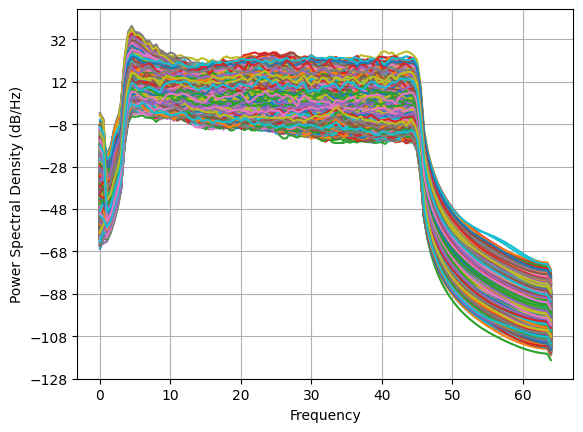

In [ ]:
x=[]
y=[]
for subject_no in range(1, 23):  # Loop through subjects s01 to s22
        subject_id = f's{subject_no:02}'
        print(f"Processing data for subject: {subject_id}")  # Print the subject ID
        a,b=get_data(subject_id)
        x.append(a)
        y.append(b)
x=np.concatenate(x,axis=0)
y=np.concatenate(y,axis=0)

In [ ]:
valence,arousal,dominance,liking=decoding_binary_class(y)

In [ ]:
print(valence)

[0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 

In [ ]:
import numpy as np

# Count occurrences of each class
unique_classes, counts = np.unique(valence, return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 480 samples (54.55%)
Class 1: 400 samples (45.45%)


In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(arousal, return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 519 samples (58.98%)
Class 1: 361 samples (41.02%)


In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(dominance, return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 499 samples (56.70%)
Class 1: 381 samples (43.30%)


In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(liking, return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 606 samples (68.86%)
Class 1: 274 samples (31.14%)


# **VALENCE**

In [ ]:
print(x.shape)
print(valence.shape)

(880, 16)
(880,)


Original X shape: (880, 16)
Original y shape: (880,)
Original class distribution: Counter({0: 480, 1: 400})

After SMOTE:
X shape: (5000, 16)
y shape: (5000,)
New class distribution: Counter({0: 2500, 1: 2500})


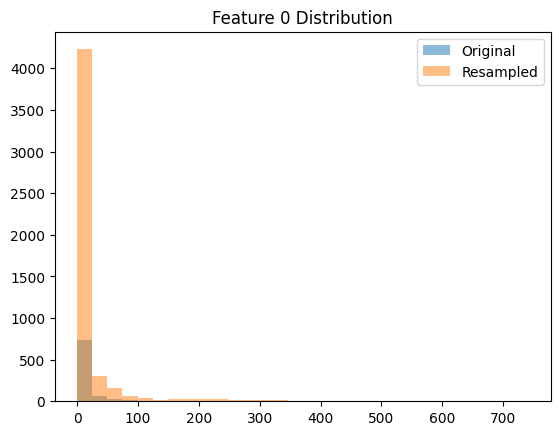

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------
# Step 1: Load your EEG data
# Replace this with your actual loading logic
# Example:
# X = np.load("X_eeg.npy")  # shape (880, 16)
# y = np.load("y_labels.npy")  # shape (880,)
# For demo, here’s dummy structure:
# X = np.random.rand(880, 16)
# y = np.concatenate([np.zeros(480), np.ones(400)]).astype(int)

# Ensure shapes are correct
print("Original X shape:", x.shape)
print("Original y shape:", valence.shape)
print("Original class distribution:", Counter(valence))

# -----------------------
# Step 2: Normalize (to preserve EEG feature patterns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# -----------------------
# Step 3: Define SMOTE strategy to balance both classes to 2500 each
target_count = 2500
sampling_strategy = {
    0: target_count,
    1: target_count
}

# -----------------------
# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, valence)

print("\nAfter SMOTE:")
print("X shape:", X_resampled.shape)
print("y shape:", y_resampled.shape)
print("New class distribution:", Counter(y_resampled))

# -----------------------
# Step 5: Optional - Inverse scaling to bring back to original EEG range
X_resampled_original_scale = scaler.inverse_transform(X_resampled)

# -----------------------
# Step 6: Save or visualize to verify
# Optional: Plot feature distribution before and after
def plot_feature_histograms(before, after, feature_index=0):
    plt.hist(before[:, feature_index], bins=30, alpha=0.5, label='Original')
    plt.hist(after[:, feature_index], bins=30, alpha=0.5, label='Resampled')
    plt.title(f"Feature {feature_index} Distribution")
    plt.legend()
    plt.show()

# Example: Plot for feature 0
plot_feature_histograms(x, X_resampled_original_scale, feature_index=0)

In [ ]:
# Initialize training and testing sets
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Partitioning logic
for i in range(0, len(X_resampled), 40):  # Step through the data in chunks of 40
    training_data.append(X_resampled[i:i+32])  # First 32 rows to training
    testing_data.append(X_resampled[i+32:i+40])  # Last 8 rows to testing
    training_labels.append(y_resampled[i:i+32])  # First 32 labels to training
    testing_labels.append(y_resampled[i+32:i+40])  # Last 8 labels to testing

# Combine all chunks
training_data = np.vstack(training_data)
testing_data = np.vstack(testing_data)
training_labels = np.hstack(training_labels)
testing_labels = np.hstack(testing_labels)

print(f"Training data shape: {training_data.shape}, Training labels shape: {training_labels.shape}")
print(f"Testing data shape: {testing_data.shape}, Testing labels shape: {testing_labels.shape}")

Training data shape: (4000, 16), Training labels shape: (4000,)
Testing data shape: (1000, 16), Testing labels shape: (1000,)


In [ ]:
from sklearn.preprocessing import StandardScaler

data = dict(trainX=training_data, testX=testing_data, trainY = training_labels,\
                    testY=testing_labels)

scaler = StandardScaler()
data['trainX'] = scaler.fit_transform(data['trainX'])
data['testX'] = scaler.transform(data['testX'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
data['trainX'], data['trainY'] = smote.fit_resample(data['trainX'], data['trainY'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
data['trainX'], data['trainY'] = rus.fit_resample(data['trainX'], data['trainY'])

In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(data['trainY'], return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 2058 samples (233.86%)
Class 1: 1942 samples (220.68%)


In [ ]:
acc, prec, recall, f1, y_test, y_pred= emotion_classification(data,"M_v")

after population
after pop fitness
after pop sorted
Generation 1/20
Generation 2/20
Generation 3/20
Generation 4/20
Generation 5/20
Generation 6/20
Generation 7/20
Generation 8/20
Generation 9/20
Generation 10/20
Generation 11/20
Generation 12/20
Generation 13/20
Generation 14/20
Generation 15/20
Generation 16/20
Generation 17/20
Generation 18/20
Generation 19/20
Generation 20/20
Best Configuration: ['relu', 'adam', '56', '16']
Best model saved at /content/drive/MyDrive/flask deployment/MLPClassifier(alpha=1e-05, hidden_layer_sizes=(56, 16), learning_rate_init=0.09,
              max_iter=1000, n_iter_no_change=80).pkl
Accuracy: 85.1%
Precision: 87.2%
Recall: 83.3%
F1 Score: 85.2%



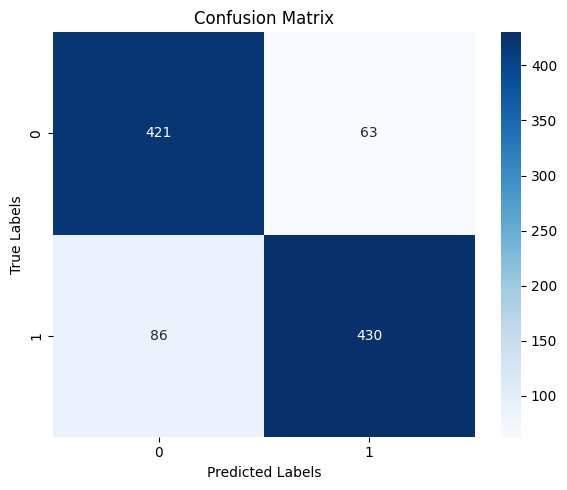

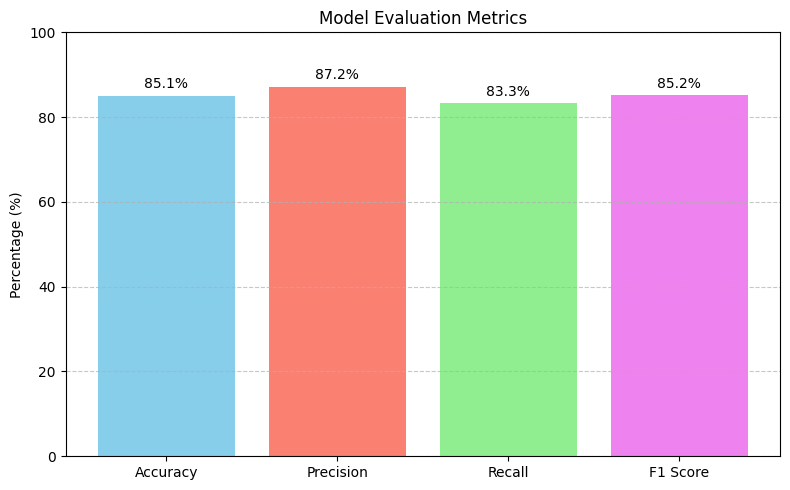

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Assuming labels are integers or strings
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [acc, prec, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="viridis")
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics")
plt.show()

# **AROUSAL**

In [ ]:
print(x.shape)
print(arousal.shape)

(880, 16)
(880,)


Original X shape: (880, 16)
Original y shape: (880,)
Original class distribution: Counter({0: 519, 1: 361})

After SMOTE:
X shape: (5000, 16)
y shape: (5000,)
New class distribution: Counter({0: 2500, 1: 2500})


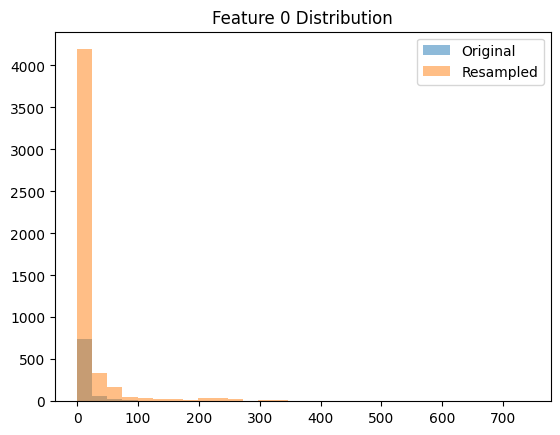

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------
# Step 1: Load your EEG data
# Replace this with your actual loading logic
# Example:
# X = np.load("X_eeg.npy")  # shape (880, 16)
# y = np.load("y_labels.npy")  # shape (880,)
# For demo, here’s dummy structure:
# X = np.random.rand(880, 16)
# y = np.concatenate([np.zeros(480), np.ones(400)]).astype(int)

# Ensure shapes are correct
print("Original X shape:", x.shape)
print("Original y shape:", arousal.shape)
print("Original class distribution:", Counter(arousal))

# -----------------------
# Step 2: Normalize (to preserve EEG feature patterns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# -----------------------
# Step 3: Define SMOTE strategy to balance both classes to 2500 each
target_count = 2500
sampling_strategy = {
    0: target_count,
    1: target_count
}

# -----------------------
# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, arousal)

print("\nAfter SMOTE:")
print("X shape:", X_resampled.shape)
print("y shape:", y_resampled.shape)
print("New class distribution:", Counter(y_resampled))

# -----------------------
# Step 5: Optional - Inverse scaling to bring back to original EEG range
X_resampled_original_scale = scaler.inverse_transform(X_resampled)

# -----------------------
# Step 6: Save or visualize to verify
# Optional: Plot feature distribution before and after
def plot_feature_histograms(before, after, feature_index=0):
    plt.hist(before[:, feature_index], bins=30, alpha=0.5, label='Original')
    plt.hist(after[:, feature_index], bins=30, alpha=0.5, label='Resampled')
    plt.title(f"Feature {feature_index} Distribution")
    plt.legend()
    plt.show()

# Example: Plot for feature 0
plot_feature_histograms(x, X_resampled_original_scale, feature_index=0)

In [ ]:
# Initialize training and testing sets
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Partitioning logic
for i in range(0, len(X_resampled), 40):  # Step through the data in chunks of 40
    training_data.append(X_resampled[i:i+32])  # First 32 rows to training
    testing_data.append(X_resampled[i+32:i+40])  # Last 8 rows to testing
    training_labels.append(y_resampled[i:i+32])  # First 32 labels to training
    testing_labels.append(y_resampled[i+32:i+40])  # Last 8 labels to testing

# Combine all chunks
training_data = np.vstack(training_data)
testing_data = np.vstack(testing_data)
training_labels = np.hstack(training_labels)
testing_labels = np.hstack(testing_labels)

print(f"Training data shape: {training_data.shape}, Training labels shape: {training_labels.shape}")
print(f"Testing data shape: {testing_data.shape}, Testing labels shape: {testing_labels.shape}")

Training data shape: (4000, 16), Training labels shape: (4000,)
Testing data shape: (1000, 16), Testing labels shape: (1000,)


In [ ]:
data = dict(trainX=training_data, testX=testing_data, trainY = training_labels,\
                    testY=testing_labels)

scaler = StandardScaler()
data['trainX'] = scaler.fit_transform(data['trainX'])
data['testX'] = scaler.transform(data['testX'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
data['trainX'], data['trainY'] = smote.fit_resample(data['trainX'], data['trainY'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
data['trainX'], data['trainY'] = rus.fit_resample(data['trainX'], data['trainY'])

In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(data['trainY'], return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 1971 samples (223.98%)
Class 1: 2029 samples (230.57%)


In [ ]:
acc, prec, recall, f1, y_test, y_pred= emotion_classification(data,"M_a")

after population
after pop fitness
after pop sorted
Generation 1/20
Generation 2/20
Generation 3/20
Generation 4/20
Generation 5/20
Generation 6/20
Generation 7/20
Generation 8/20
Generation 9/20
Generation 10/20
Generation 11/20
Generation 12/20
Generation 13/20
Generation 14/20
Generation 15/20
Generation 16/20
Generation 17/20
Generation 18/20
Generation 19/20
Generation 20/20
Best Configuration: ['relu', 'adam', '56', '16']
Best model saved at /content/drive/MyDrive/flask deployment/MLPClassifier(alpha=1e-05, hidden_layer_sizes=(56, 16), learning_rate_init=0.09,
              max_iter=1000, n_iter_no_change=80).pkl
Accuracy: 84.5%
Precision: 91.0%
Recall: 76.6%
F1 Score: 83.2%



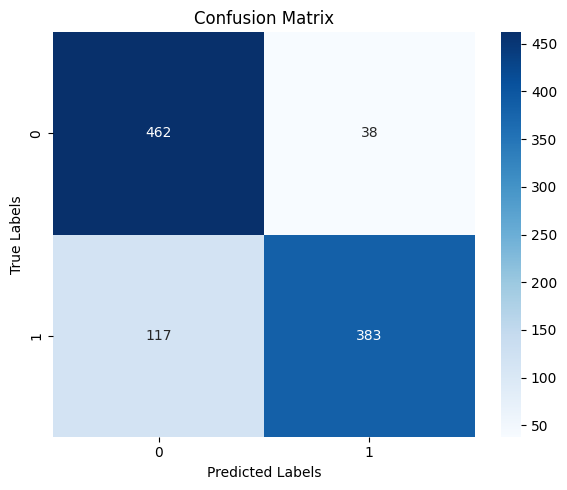

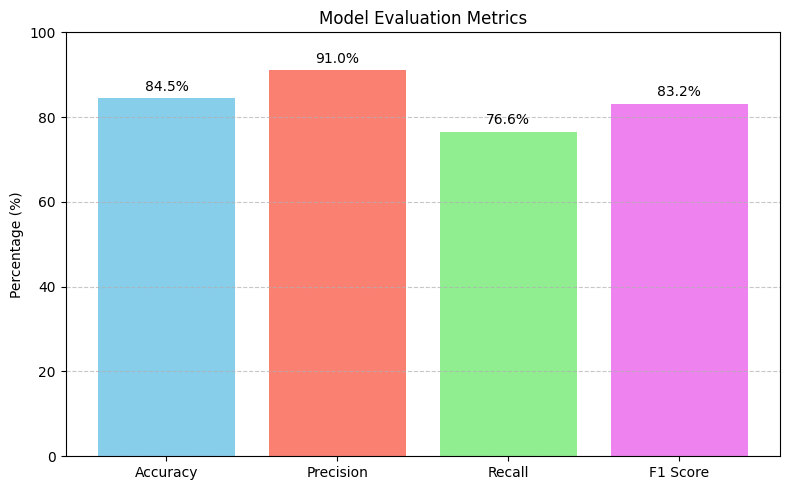

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Assuming labels are integers or strings
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [acc, prec, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="viridis")
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics")
plt.show()

# **DOMINANCE**

In [ ]:
print(x.shape)
print(dominance.shape)

(880, 16)
(880,)


Original X shape: (880, 16)
Original y shape: (880,)
Original class distribution: Counter({0: 499, 1: 381})

After SMOTE:
X shape: (5000, 16)
y shape: (5000,)
New class distribution: Counter({0: 2500, 1: 2500})


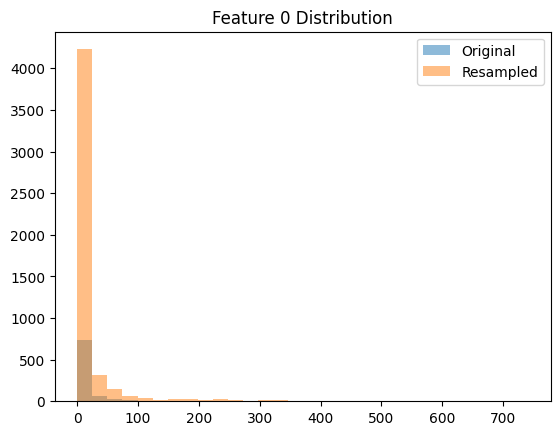

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------
# Step 1: Load your EEG data
# Replace this with your actual loading logic
# Example:
# X = np.load("X_eeg.npy")  # shape (880, 16)
# y = np.load("y_labels.npy")  # shape (880,)
# For demo, here’s dummy structure:
# X = np.random.rand(880, 16)
# y = np.concatenate([np.zeros(480), np.ones(400)]).astype(int)

# Ensure shapes are correct
print("Original X shape:", x.shape)
print("Original y shape:", dominance.shape)
print("Original class distribution:", Counter(dominance))

# -----------------------
# Step 2: Normalize (to preserve EEG feature patterns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# -----------------------
# Step 3: Define SMOTE strategy to balance both classes to 2500 each
target_count = 2500
sampling_strategy = {
    0: target_count,
    1: target_count
}

# -----------------------
# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, dominance)

print("\nAfter SMOTE:")
print("X shape:", X_resampled.shape)
print("y shape:", y_resampled.shape)
print("New class distribution:", Counter(y_resampled))

# -----------------------
# Step 5: Optional - Inverse scaling to bring back to original EEG range
X_resampled_original_scale = scaler.inverse_transform(X_resampled)

# -----------------------
# Step 6: Save or visualize to verify
# Optional: Plot feature distribution before and after
def plot_feature_histograms(before, after, feature_index=0):
    plt.hist(before[:, feature_index], bins=30, alpha=0.5, label='Original')
    plt.hist(after[:, feature_index], bins=30, alpha=0.5, label='Resampled')
    plt.title(f"Feature {feature_index} Distribution")
    plt.legend()
    plt.show()

# Example: Plot for feature 0
plot_feature_histograms(x, X_resampled_original_scale, feature_index=0)

In [ ]:
# Initialize training and testing sets
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Partitioning logic
for i in range(0, len(X_resampled), 40):  # Step through the data in chunks of 40
    training_data.append(X_resampled[i:i+32])  # First 32 rows to training
    testing_data.append(X_resampled[i+32:i+40])  # Last 8 rows to testing
    training_labels.append(y_resampled[i:i+32])  # First 32 labels to training
    testing_labels.append(y_resampled[i+32:i+40])  # Last 8 labels to testing

# Combine all chunks
training_data = np.vstack(training_data)
testing_data = np.vstack(testing_data)
training_labels = np.hstack(training_labels)
testing_labels = np.hstack(testing_labels)

print(f"Training data shape: {training_data.shape}, Training labels shape: {training_labels.shape}")
print(f"Testing data shape: {testing_data.shape}, Testing labels shape: {testing_labels.shape}")

Training data shape: (4000, 16), Training labels shape: (4000,)
Testing data shape: (1000, 16), Testing labels shape: (1000,)


In [ ]:
data = dict(trainX=training_data, testX=testing_data, trainY = training_labels,\
                    testY=testing_labels)

scaler = StandardScaler()
data['trainX'] = scaler.fit_transform(data['trainX'])
data['testX'] = scaler.transform(data['testX'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
data['trainX'], data['trainY'] = smote.fit_resample(data['trainX'], data['trainY'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
data['trainX'], data['trainY'] = rus.fit_resample(data['trainX'], data['trainY'])

In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(data['trainY'], return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 1971 samples (223.98%)
Class 1: 2029 samples (230.57%)


In [ ]:
acc, prec, recall, f1, y_test, y_pred= emotion_classification(data,"M_d")

after population
after pop fitness
after pop sorted
Generation 1/20
Generation 2/20
Generation 3/20
Generation 4/20
Generation 5/20
Generation 6/20
Generation 7/20
Generation 8/20
Generation 9/20
Generation 10/20
Generation 11/20
Generation 12/20
Generation 13/20
Generation 14/20
Generation 15/20
Generation 16/20
Generation 17/20
Generation 18/20
Generation 19/20
Generation 20/20
Best Configuration: ['relu', 'adam', '56', '16']
Best model saved at /content/drive/MyDrive/flask deployment/MLPClassifier(alpha=1e-05, hidden_layer_sizes=(56, 16), learning_rate_init=0.09,
              max_iter=1000, n_iter_no_change=80).pkl
Accuracy: 83.4%
Precision: 80.3%
Recall: 89.4%
F1 Score: 84.6%



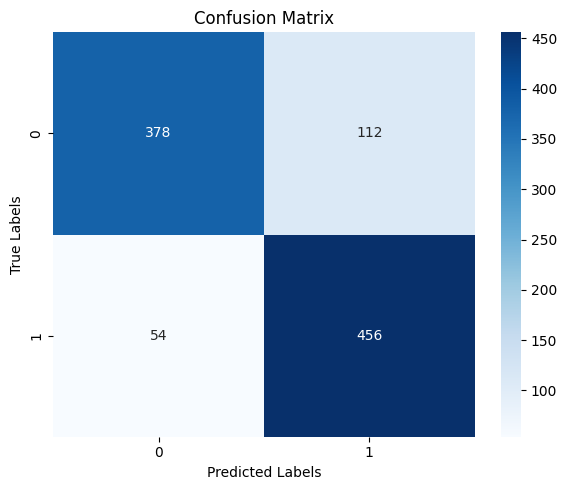

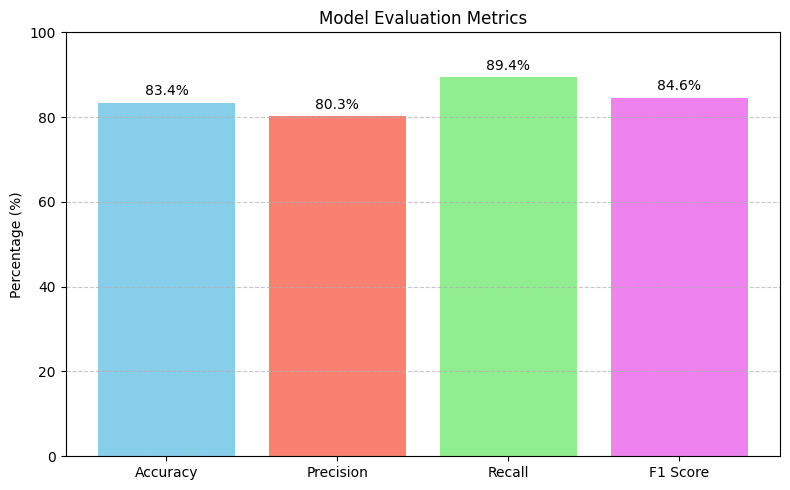

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Assuming labels are integers or strings
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [acc, prec, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="viridis")
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics")
plt.show()

# **LIKING**

In [ ]:
print(x.shape)
print(liking.shape)

(880, 16)
(880,)


Original X shape: (880, 16)
Original y shape: (880,)
Original class distribution: Counter({0: 606, 1: 274})

After SMOTE:
X shape: (5000, 16)
y shape: (5000,)
New class distribution: Counter({0: 2500, 1: 2500})


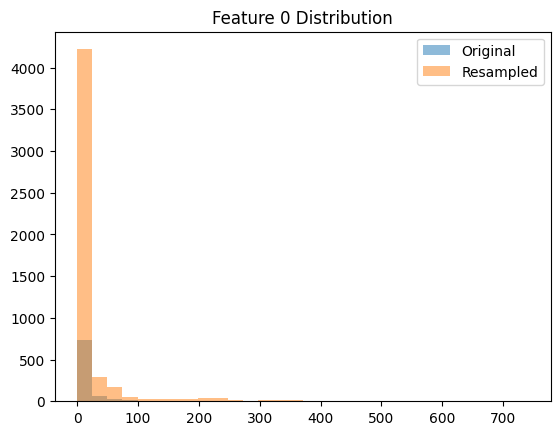

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------
# Step 1: Load your EEG data
# Replace this with your actual loading logic
# Example:
# X = np.load("X_eeg.npy")  # shape (880, 16)
# y = np.load("y_labels.npy")  # shape (880,)
# For demo, here’s dummy structure:
# X = np.random.rand(880, 16)
# y = np.concatenate([np.zeros(480), np.ones(400)]).astype(int)

# Ensure shapes are correct
print("Original X shape:", x.shape)
print("Original y shape:", liking.shape)
print("Original class distribution:", Counter(liking))

# -----------------------
# Step 2: Normalize (to preserve EEG feature patterns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# -----------------------
# Step 3: Define SMOTE strategy to balance both classes to 2500 each
target_count = 2500
sampling_strategy = {
    0: target_count,
    1: target_count
}

# -----------------------
# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, liking)

print("\nAfter SMOTE:")
print("X shape:", X_resampled.shape)
print("y shape:", y_resampled.shape)
print("New class distribution:", Counter(y_resampled))

# -----------------------
# Step 5: Optional - Inverse scaling to bring back to original EEG range
X_resampled_original_scale = scaler.inverse_transform(X_resampled)

# -----------------------
# Step 6: Save or visualize to verify
# Optional: Plot feature distribution before and after
def plot_feature_histograms(before, after, feature_index=0):
    plt.hist(before[:, feature_index], bins=30, alpha=0.5, label='Original')
    plt.hist(after[:, feature_index], bins=30, alpha=0.5, label='Resampled')
    plt.title(f"Feature {feature_index} Distribution")
    plt.legend()
    plt.show()

# Example: Plot for feature 0
plot_feature_histograms(x, X_resampled_original_scale, feature_index=0)

In [ ]:
# Initialize training and testing sets
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Partitioning logic
for i in range(0, len(X_resampled), 40):  # Step through the data in chunks of 40
    training_data.append(X_resampled[i:i+32])  # First 32 rows to training
    testing_data.append(X_resampled[i+32:i+40])  # Last 8 rows to testing
    training_labels.append(y_resampled[i:i+32])  # First 32 labels to training
    testing_labels.append(y_resampled[i+32:i+40])  # Last 8 labels to testing

# Combine all chunks
training_data = np.vstack(training_data)
testing_data = np.vstack(testing_data)
training_labels = np.hstack(training_labels)
testing_labels = np.hstack(testing_labels)

print(f"Training data shape: {training_data.shape}, Training labels shape: {training_labels.shape}")
print(f"Testing data shape: {testing_data.shape}, Testing labels shape: {testing_labels.shape}")

Training data shape: (4000, 16), Training labels shape: (4000,)
Testing data shape: (1000, 16), Testing labels shape: (1000,)


In [ ]:
data = dict(trainX=training_data, testX=testing_data, trainY = training_labels,\
                    testY=testing_labels)

scaler = StandardScaler()
data['trainX'] = scaler.fit_transform(data['trainX'])
data['testX'] = scaler.transform(data['testX'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
data['trainX'], data['trainY'] = smote.fit_resample(data['trainX'], data['trainY'])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
data['trainX'], data['trainY'] = rus.fit_resample(data['trainX'], data['trainY'])

In [ ]:
# Count occurrences of each class
unique_classes, counts = np.unique(data['trainY'], return_counts=True)

# Display the distribution
print(f"Class 0: {counts[0]} samples ({counts[0] / len(y) * 100:.2f}%)")
print(f"Class 1: {counts[1]} samples ({counts[1] / len(y) * 100:.2f}%)")

Class 0: 1971 samples (223.98%)
Class 1: 2029 samples (230.57%)


In [ ]:
acc, prec, recall, f1, y_test, y_pred= emotion_classification(data,"M_l")

after population
after pop fitness
after pop sorted
Generation 1/20
Generation 2/20
Generation 3/20
Generation 4/20
Generation 5/20
Generation 6/20
Generation 7/20
Generation 8/20
Generation 9/20
Generation 10/20
Generation 11/20
Generation 12/20
Generation 13/20
Generation 14/20
Generation 15/20
Generation 16/20
Generation 17/20
Generation 18/20
Generation 19/20
Generation 20/20
Best Configuration: ['relu', 'adam', '56', '16']
Best model saved at /content/drive/MyDrive/flask deployment/MLPClassifier(alpha=1e-05, hidden_layer_sizes=(56, 16), learning_rate_init=0.09,
              max_iter=1000, n_iter_no_change=80).pkl
Accuracy: 79.1%
Precision: 78.2%
Recall: 83.9%
F1 Score: 80.9%



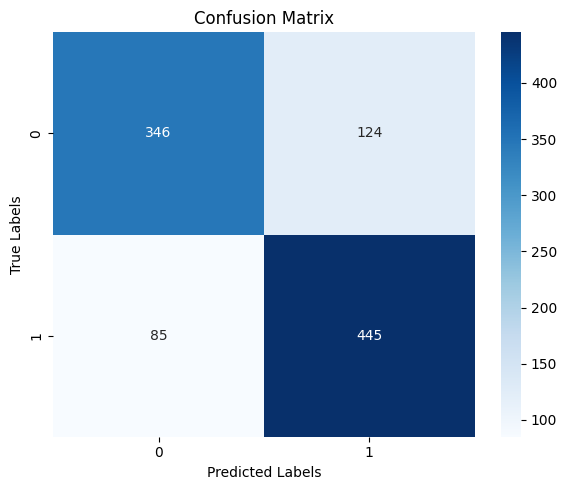

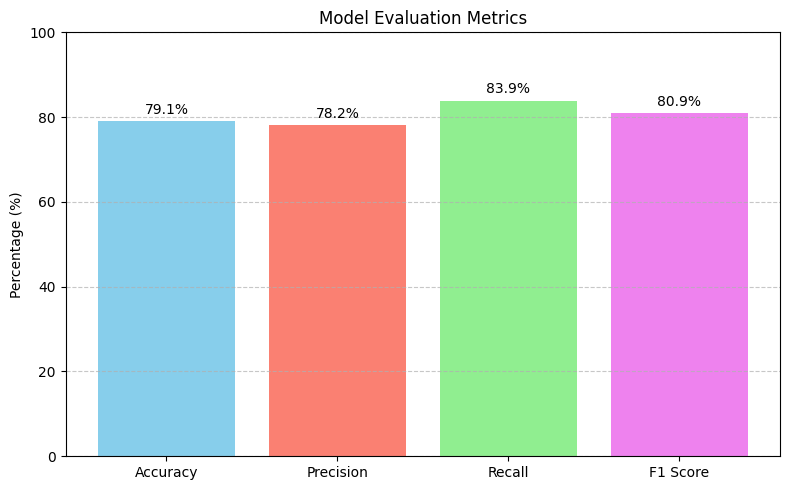

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # Assuming labels are integers or strings
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [acc, prec, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette="viridis")
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("Performance Metrics")
plt.show()